In [80]:
%pylab inline
import csv
import pyfits
matplotlib.rcParams['figure.figsize']=(8,5)

Populating the interactive namespace from numpy and matplotlib


In [61]:
def timeToS(hours,minutes,seconds):
    return hours*3600+minutes*60+seconds

In [63]:
ttimes=[];
with open('times.csv', 'r') as csvfile:
    times = csv.reader(csvfile)
    first=1;
    init=0;
    for row in times:
        tS=row[1].split("_")[1].split(":");
        timeSecs=timeToS(int(tS[0]),int(tS[1]),int(tS[2]));
        if(first):
            init=timeSecs;
            ttimes.append(0);
            first=0;
        else:
            toAppend=timeSecs-init;
            if(toAppend<0):
                toAppend+=24*3600;
            ttimes.append(toAppend);
ttimes=np.asarray(ttimes);

In [64]:
sdo = pyfits.open('hmi.m_45s.magnetogram.subregion_x1y1.fits');
##Puede aparecer un warning cuando se corra la instrucción de abajo , esto se da como consecuencia de que el archivo
## .fits no sigue el estándar FITS a cabalidad.
sdo[0].header

/usr/lib/python3.4/site-packages/pyfits/verify.py:115: VerifyWarning: Verification reported errors:
  warnings.warn(line, VerifyWarning)
/usr/lib/python3.4/site-packages/pyfits/verify.py:115: VerifyWarning: Card 'SOURCE' is not FITS standard (invalid value string: "'hmi.lev1[:#17270357,#17270333,#17270321,#17270393,#17270381,#17270441").  Fixed 'SOURCE' card to meet the FITS standard.
  warnings.warn(line, VerifyWarning)
/usr/lib/python3.4/site-packages/pyfits/verify.py:115: VerifyWarning: Note: PyFITS uses zero-based indexing.

  warnings.warn(line, VerifyWarning)
/usr/lib/python3.4/site-packages/pyfits/verify.py:115: VerifyWarning: Card 'CRDER1' is not FITS standard (invalid value string: 'nan').  Fixed 'CRDER1' card to meet the FITS standard.
  warnings.warn(line, VerifyWarning)
/usr/lib/python3.4/site-packages/pyfits/verify.py:115: VerifyWarning: Card 'CRDER2' is not FITS standard (invalid value string: 'nan').  Fixed 'CRDER2' card to meet the FITS standard.
  warnings.warn(line, V

SIMPLE  =                    T / Written by IDL:  Wed Apr 15 08:21:09 2015      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  398 /Number of positions along axis 1                
NAXIS2  =                  199 /Number of positions along axis 2                
NAXIS3  =                  207 /Number of positions along axis 3                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2012-09-05T08:09:16'                                                 
DATE-OBS= '2011-03-09T23:20:44.90'                                              
TELESCOP= 'SDO/HMI'                                                             
INSTRUME= 'HMI_FRONT2'      

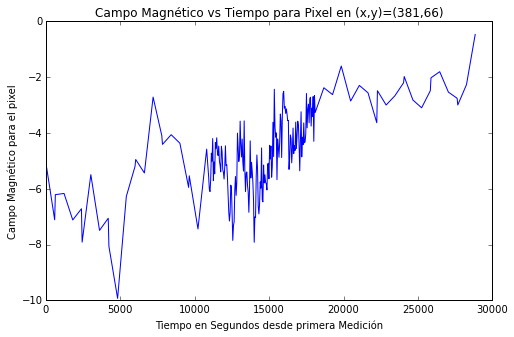

In [83]:
## El pixel a estudiar es seleccionado aleatoriamente mediante el uso de la función np.random.randint(). Del Header
## de sdo se encuentra que existen 398 posibles posiciones en X para el pixel y 199 posibles posiciones en y.
pX=np.random.randint(399);
pY=np.random.randint(200);

##x esta en data[:,:,Num de X]
##y esta en data[:,Num de Y,:]
##Se selecciona el campo magnético del pixel a estudiar , i.e , se selecciona el arreglo dado por:
##    Bz=data[:,pY,pX]
Bz=data[:,pY,pX];
plot(ttimes,Bz);
title("Campo Magnético vs Tiempo para Pixel en (x,y)=(%d,%d)"%(pX,pY));
xlabel("Tiempo en Segundos desde primera Medición");
ylabel("Campo Magnético para el pixel")